In [1]:
#hi,this is a stroke predictor project
!pip install seaborn
!pip install plotly
import seaborn as sns
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 
#the dataset has to be in documents folder only

In [3]:
df.head()
#by default 5 displayed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe() 
#to get the descriptive statistics

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
856,71929,Male,2.0,0,0,No,children,Rural,56.77,20.9,Unknown,0
1947,44503,Female,25.0,0,0,No,Private,Rural,65.95,35.0,never smoked,0
3002,71669,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked,0
3987,19324,Female,51.0,0,0,Yes,Govt_job,Urban,90.67,37.8,Unknown,0
1608,9011,Male,59.0,0,0,Yes,Private,Urban,93.58,25.1,smokes,0
2175,48435,Female,2.0,0,0,No,children,Rural,155.14,13.7,Unknown,0
1708,36666,Male,14.0,0,0,No,children,Urban,57.95,17.1,Unknown,0
2743,71327,Female,47.0,0,0,No,Private,Rural,143.45,23.8,never smoked,0
938,27146,Female,23.0,0,0,No,Private,Rural,92.87,30.1,never smoked,0
1215,61983,Female,41.0,0,0,Yes,Private,Urban,133.76,43.4,smokes,0


In [6]:
df.info() 
#column name datatype ,get to know non null data where where 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#data cleaning 
#id removal becoz not nexcceasry 
df.drop(['id'],axis=1,inplace=True)  
#axis =1 mttlb column ,else axis =0 means row ,
#inplace =true means changes to thhe old existing frame only no new df is created 

In [8]:
df.head(200)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
195,Male,59.0,0,0,Yes,Private,Urban,200.62,35.8,formerly smoked,1
196,Male,70.0,1,0,Yes,Private,Rural,242.52,45.5,formerly smoked,1
197,Male,69.0,0,0,Yes,Private,Rural,93.81,28.5,Unknown,1
198,Male,79.0,0,0,Yes,Private,Rural,114.77,NaN,formerly smoked,1


In [9]:
#removing duplicate values 
df.drop_duplicates(inplace=True)

In [10]:
    df.isnull().sum()
#if null hai to give its count

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#you see bmi me null hai 
median1=df['bmi'].median()

In [12]:
df['bmi'].fillna(median1,inplace=True) 
#if null hai to usak sum phir har column ka sum 
#replaced the null value with medi

In [13]:
df.isnull().sum() 
#kuch to sum nikla jo akshatt smjhayega

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

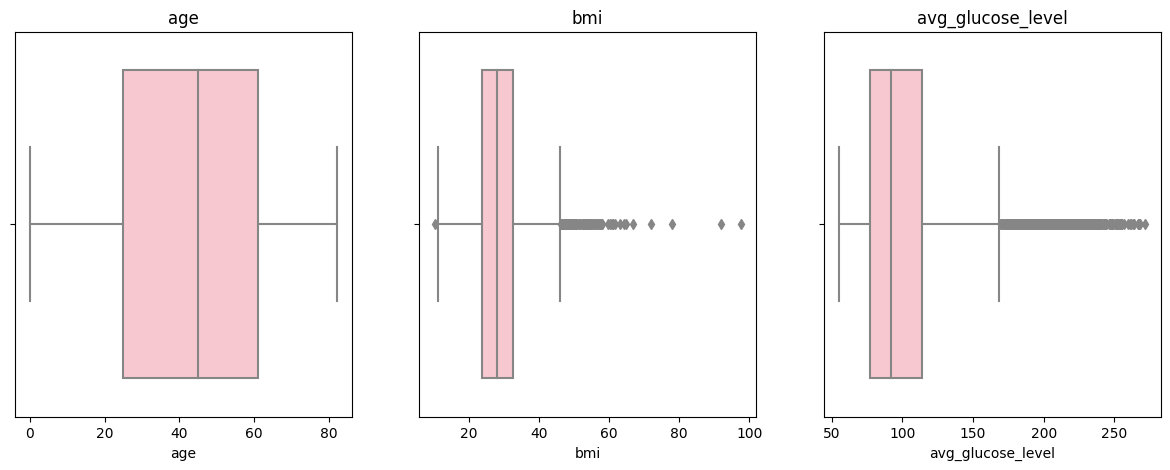

In [14]:
#outliers handling 
cols=['age' ,'bmi' ,'avg_glucose_level']
plt.figure(figsize=(20,5))
for i in range (3):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=df[cols[i]],color='pink')
    #i+1 is the current pos in subplot 
    plt.title(cols[i])

plt.show()
    



In [15]:
def detect_outlier(data,column):
    q1=df[column].quantile(.25)
    q3=df[column].quantile(.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    ls=df.index[(df[column] <lower_bound) | (df[column] >upper_bound)]
    return ls


In [16]:
index_list=[]
for column in cols:
    index_list.extend(detect_outlier(df,column))
index_list=sorted(set(index_list))

In [17]:
before= df.shape
#shape return rows*cols
df=df.drop(index_list)
after=df.shape
print(before ,after)



(5110, 11) (4391, 11)


In [64]:
#data visualisation
custom_palette = ["pink","cornflowerblue","lightseagreen","steelblue","linen"]
sns.set_palette(custom_palette)

Text(0.5, 1.0, 'Count by Gender')

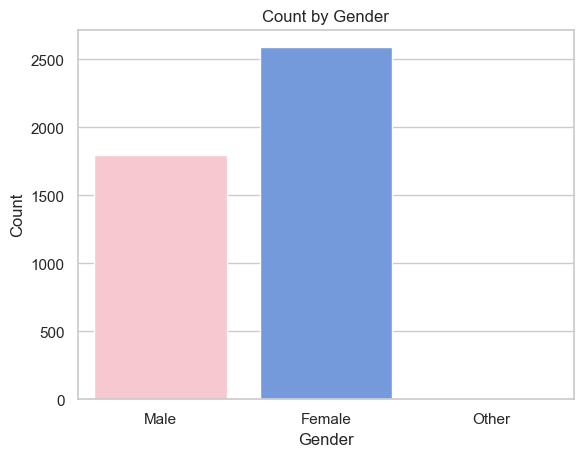

In [61]:
#gender vs count
sns.countplot(x='gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by Gender')

In [58]:
#married vs not married
married=dict(df['ever_married'].value_counts())
fig=px.pie(names=married.keys(),values=married.values(),title="Martial Status",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')



In [62]:
#had stroke 
strokes=dict(df['stroke'].value_counts())
fig=px.pie(names=strokes.keys(),values=strokes.values(),title="Had A stroke",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')


Text(0.5, 1.0, 'Count of Strokes by Gender')

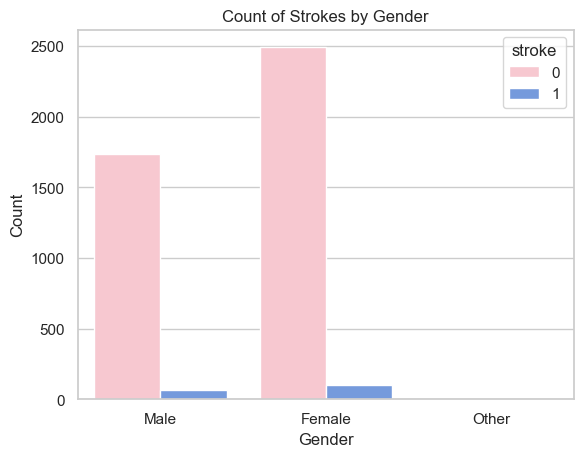

In [116]:
#on the basis of gender 
#gender and stroke 
#gender and hypertension

sns.countplot(x='gender', hue='stroke', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Strokes by Gender')

 


Text(0.5, 1.0, 'Count of Hypertension by Gender')

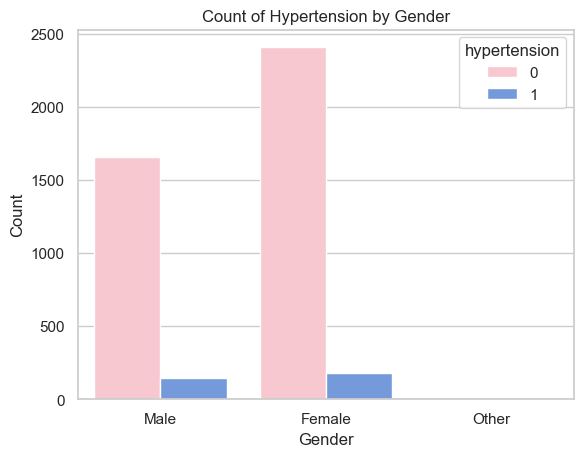

In [115]:


sns.countplot(x='gender', hue='hypertension', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Hypertension by Gender')
 

Text(0.5, 1.0, 'Count of Heart Disease by Gender')

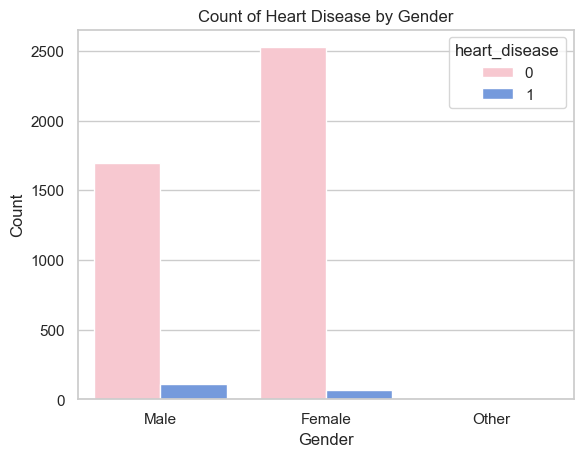

In [114]:

sns.countplot(x='gender', hue='heart_disease', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Gender')
 

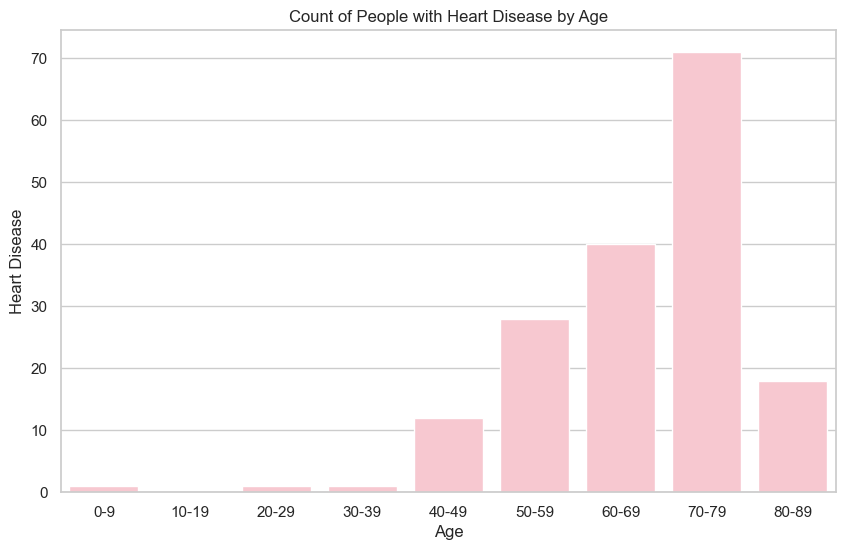

In [24]:
# Group data by age and sum heart disease values
age_bins = [0,10,20, 30, 40, 50, 60, 70,80,90]
age_labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89']

# Group age values into age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
heart_disease_counts = df.groupby('age_group')['heart_disease'].apply(lambda x: (x == 1).sum()).reset_index()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='heart_disease', data=heart_disease_counts, color='pink')

plt.title('Count of People with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()

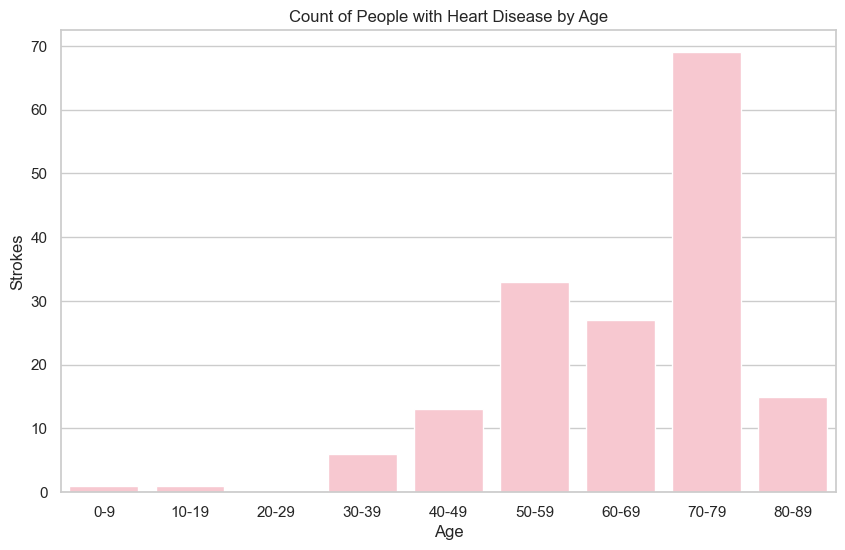

In [25]:
# Group data by age and sum heart disease values
age_bins = [0,10,20, 30, 40, 50, 60, 70,80,90]
age_labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89']

# Group age values into age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
heart_disease_counts = df.groupby('age_group')['stroke'].apply(lambda x: (x == 1).sum()).reset_index()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='stroke', data=heart_disease_counts, color='pink')

plt.title('Count of People with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Strokes')
plt.show()

In [66]:
#work type
worktypew=dict(df['work_type'].value_counts())
fig=px.pie(names=worktypew.keys(),values=worktypew.values(),title="Worktype",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')


In [67]:
#residence type
res=dict(df['Residence_type'].value_counts())
fig=px.pie(names=res.keys(),values=res.values(),title="Residence type",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')


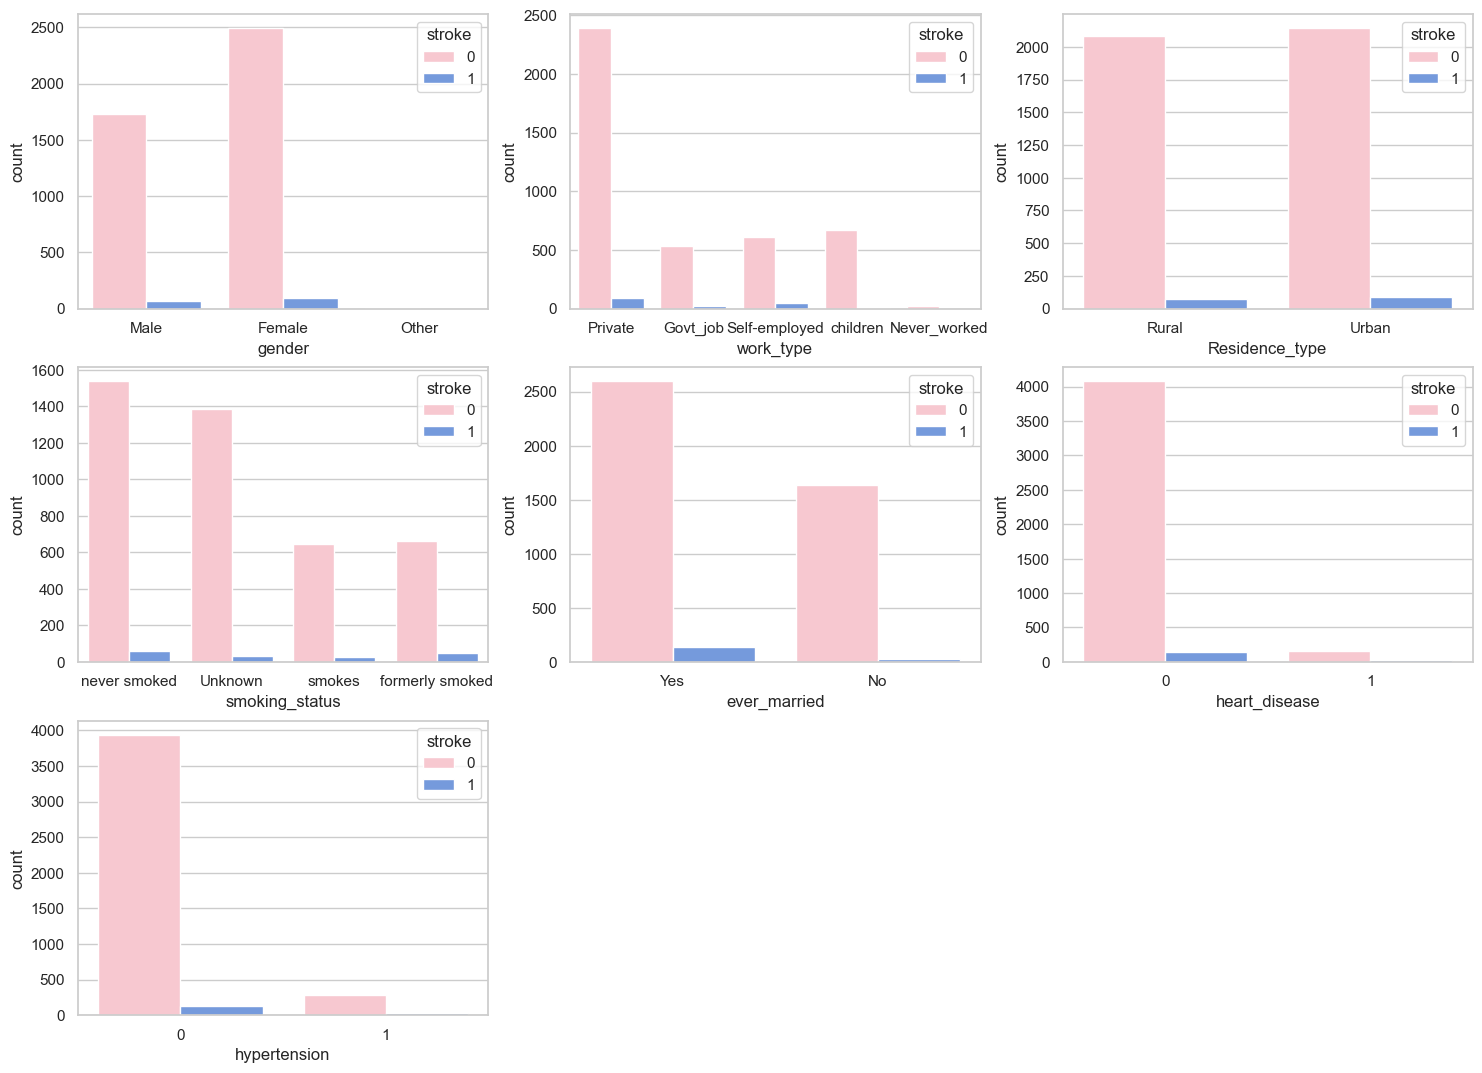

In [90]:
cols=['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(18, 13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=cols[i], hue='stroke',data=df)

C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



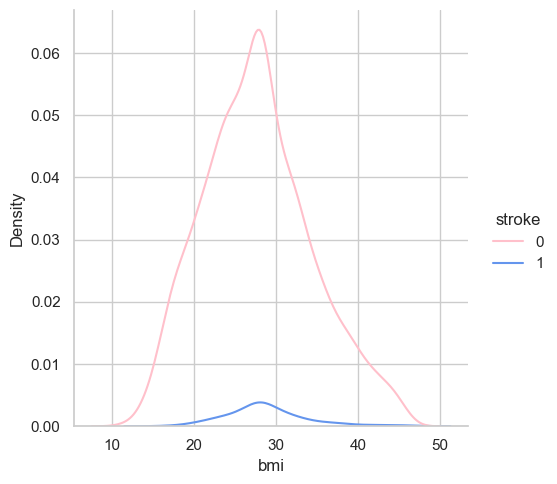

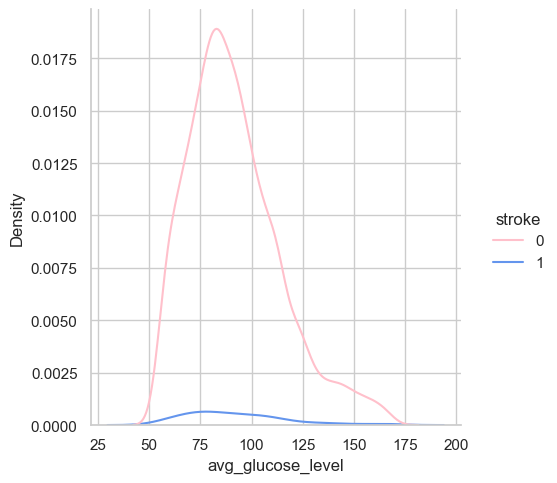

In [113]:
#density graph
#bmi vs stroke 
#avg glucose vs stroke
sns.displot(data=df,x='bmi',hue='stroke',kind ='kde')
sns.displot(data=df,x='avg_glucose_level',hue='stroke',kind ='kde')

    

